# Statement

The Sure Tomorrow insurance company wants to solve several tasks with the help of Machine Learning and you are asked to evaluate that possibility.

- Task 1: Find customers who are similar to a given customer. This will help the company's agents with marketing.
- Task 2: Predict whether a new customer is likely to receive an insurance benefit. Can a prediction model do better than a dummy model?
- Task 3: Predict the number of insurance benefits a new customer is likely to receive using a linear regression model.
- Task 4: Protect clients' personal data without breaking the model from the previous task. It's necessary to develop a data transformation algorithm that would make it hard to recover personal information if the data fell into the wrong hands. This is called data masking, or data obfuscation. But the data should be protected in such a way that the quality of machine learning models doesn't suffer. You don't need to pick the best model, just prove that the algorithm works correctly.

# Data Preprocessing & Exploration

## Initialization

In [1]:
import numpy as np
import pandas as pd
import math

import seaborn as sns

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier

from sklearn.model_selection import train_test_split

from IPython.display import display

## Load Data

Load data and conduct a basic check that it's free from obvious issues.

In [2]:
df = pd.read_csv('insurance_us.csv')

We rename the colums to make the code look more consistent with its style.

In [3]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [4]:
df.sample(10)

gender   age   income  family_members  insurance_benefits
403        0  32.0  58900.0               2                   0
1285       1  36.0  52900.0               1                   0
4021       1  35.0  34900.0               1                   0
2979       1  21.0  19600.0               0                   0
3741       1  21.0  38700.0               2                   0
2185       0  25.0  58000.0               0                   0
4534       0  34.0  41500.0               0                   0
4945       1  21.0  45800.0               0                   0
3706       1  38.0  37700.0               2                   0
3731       1  31.0  57100.0               2                   0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [6]:
# we may want to fix the age type (from float to int) though this is not critical

# write your conversion here if you choose:
df['age'] = df['age'].astype(int)

In [7]:
# check to see that the conversion was successful
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


In [8]:
# now have a look at the data's descriptive statistics. 
# Does everything look okay?

In [9]:
df.describe()

gender          age        income  family_members  \
count  5000.000000  5000.000000   5000.000000     5000.000000   
mean      0.499000    30.952800  39916.360000        1.194200   
std       0.500049     8.440807   9900.083569        1.091387   
min       0.000000    18.000000   5300.000000        0.000000   
25%       0.000000    24.000000  33300.000000        0.000000   
50%       0.000000    30.000000  40200.000000        1.000000   
75%       1.000000    37.000000  46600.000000        2.000000   
max       1.000000    65.000000  79000.000000        6.000000   

       insurance_benefits  
count         5000.000000  
mean             0.148000  
std              0.463183  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%              0.000000  
max              5.000000

Data looks okay based on descriptive statistics

## EDA

Let's quickly check whether there are certain groups of customers by looking at the pair plot.

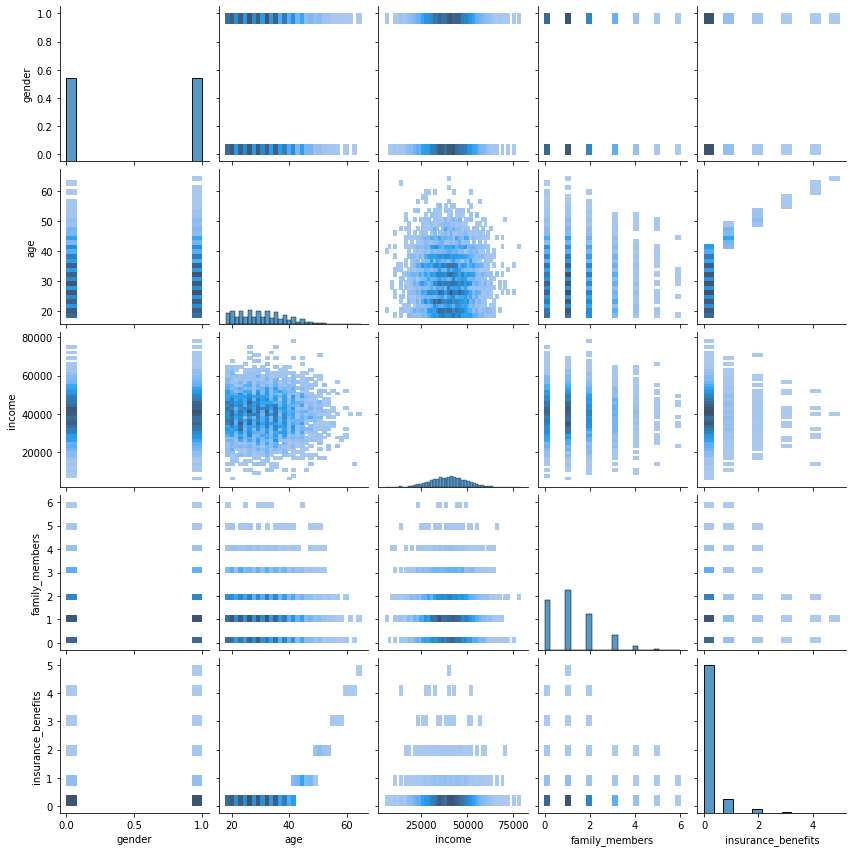

In [10]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

Ok, it is a bit difficult to spot obvious groups (clusters) as it is difficult to combine several variables simultaneously (to analyze multivariate distributions). That's where LA and ML can be quite handy.

# Task 1. Similar Customers

In the language of ML, it is necessary to develop a procedure that returns k nearest neighbors (objects) for a given object based on the distance between the objects.

You may want to review the following lessons (chapter -> lesson)
- Distance Between Vectors -> Euclidean Distance
- Distance Between Vectors -> Manhattan Distance

To solve the task, we can try different distance metrics.

Write a function that returns k nearest neighbors for an $n^{th}$ object based on a specified distance metric. The number of received insurance benefits should not be taken into account for this task. 

You can use a ready implementation of the kNN algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) or use your own.

Test it for four combination of two cases
- Scaling
  - the data is not scaled
  - the data is scaled with the [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html) scaler
- Distance Metrics
  - Euclidean
  - Manhattan

Answer these questions:
- Does the data being not scaled affect the kNN algorithm? If so, how does that appear?
- How similar are the results using the Manhattan distance metric (regardless of the scaling)?

In [11]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [12]:
def get_knn(df, n, k, metric):
    
    """
    Returns k nearest neighbors

    :param df: pandas DataFrame used to find similar objects within
    :param n: object no for which the nearest neighbours are looked for
    :param k: the number of the nearest neighbours to return
    :param metric: name of distance metric
    """
    if metric == 'Euclidean':
        nbrs = NearestNeighbors(p=2)
    elif metric == 'Manhattan':
        nbrs = NearestNeighbors(p=1)     
    nbrs.fit(df[feature_names])
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

Scaling the data.

In [13]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [14]:
df_scaled.sample(5)

gender       age    income  family_members  insurance_benefits
1084     1.0  0.430769  0.378481        0.000000                   0
1199     0.0  0.507692  0.510127        0.333333                   0
900      0.0  0.276923  0.488608        0.333333                   0
4935     1.0  0.292308  0.413924        0.000000                   0
3563     0.0  0.446154  0.517722        0.000000                   0

Now, let's get similar records for a given one for every combination

In [15]:
get_knn(df, 25, 10, 'Euclidean')

gender  age   income  family_members  insurance_benefits   distance
25         1   47  38400.0               3                   1   0.000000
375        1   46  38400.0               1                   1   2.236068
1654       0   44  38400.0               1                   1   3.741657
4581       1   41  38400.0               1                   0   6.324555
318        0   41  38400.0               1                   0   6.403124
706        1   40  38400.0               1                   0   7.280110
2989       1   40  38400.0               0                   0   7.615773
4863       0   39  38400.0               2                   0   8.124038
4086       0   37  38400.0               0                   0  10.488088
4051       1   35  38400.0               1                   0  12.165525

In [16]:
get_knn(df_scaled, 25, 10, 'Euclidean')

gender       age    income  family_members  insurance_benefits  distance
25       1.0  0.723077  0.486076             0.5                   1  0.000000
954      1.0  0.707692  0.508861             0.5                   1  0.027492
2491     1.0  0.676923  0.482278             0.5                   1  0.046310
936      1.0  0.692308  0.435443             0.5                   1  0.059249
4197     1.0  0.753846  0.432911             0.5                   1  0.061427
2469     1.0  0.784615  0.520253             0.5                   2  0.070392
2407     1.0  0.676923  0.551899             0.5                   1  0.080392
4130     1.0  0.661538  0.432911             0.5                   1  0.081323
3957     1.0  0.661538  0.429114             0.5                   1  0.083855
2761     1.0  0.692308  0.406329             0.5                   1  0.085477

In [17]:
# Original values for comparison
df.iloc[get_knn(df_scaled, 25, 10, 'Euclidean').index]

gender  age   income  family_members  insurance_benefits
25         1   47  38400.0               3                   1
954        1   46  40200.0               3                   1
2491       1   44  38100.0               3                   1
936        1   45  34400.0               3                   1
4197       1   49  34200.0               3                   1
2469       1   51  41100.0               3                   2
2407       1   44  43600.0               3                   1
4130       1   43  34200.0               3                   1
3957       1   43  33900.0               3                   1
2761       1   45  32100.0               3                   1

In [18]:
get_knn(df, 25, 10, 'Manhattan')

gender  age   income  family_members  insurance_benefits  distance
25         1   47  38400.0               3                   1       0.0
375        1   46  38400.0               1                   1       3.0
1654       0   44  38400.0               1                   1       6.0
4581       1   41  38400.0               1                   0       8.0
318        0   41  38400.0               1                   0       9.0
706        1   40  38400.0               1                   0       9.0
2989       1   40  38400.0               0                   0      10.0
4863       0   39  38400.0               2                   0      10.0
4086       0   37  38400.0               0                   0      14.0
3399       1   33  38400.0               3                   0      14.0

In [19]:
get_knn(df_scaled, 25, 10, 'Manhattan')

gender       age    income  family_members  insurance_benefits  distance
25       1.0  0.723077  0.486076             0.5                   1  0.000000
954      1.0  0.707692  0.508861             0.5                   1  0.038169
2491     1.0  0.676923  0.482278             0.5                   1  0.049951
936      1.0  0.692308  0.435443             0.5                   1  0.081402
4197     1.0  0.753846  0.432911             0.5                   1  0.083934
2469     1.0  0.784615  0.520253             0.5                   2  0.095716
2761     1.0  0.692308  0.406329             0.5                   1  0.110516
2407     1.0  0.676923  0.551899             0.5                   1  0.111977
4130     1.0  0.661538  0.432911             0.5                   1  0.114703
3957     1.0  0.661538  0.429114             0.5                   1  0.118500

In [20]:
# Original values for comparison
df.iloc[get_knn(df_scaled, 25, 10, 'Manhattan').index]

gender  age   income  family_members  insurance_benefits
25         1   47  38400.0               3                   1
954        1   46  40200.0               3                   1
2491       1   44  38100.0               3                   1
936        1   45  34400.0               3                   1
4197       1   49  34200.0               3                   1
2469       1   51  41100.0               3                   2
2761       1   45  32100.0               3                   1
2407       1   44  43600.0               3                   1
4130       1   43  34200.0               3                   1
3957       1   43  33900.0               3                   1

Answers to the questions

**Does the data being not scaled affect the kNN algorithm? If so, how does that appear?** 

Yes it does. The income class has higher priority if data is not scaled, so the nearest neighbors tend to have the same income but a lot of variation in gender, age and number of family members. Whereas with scaled data the nearest neighbors are very similar in income, age, gender, and number of family members.

**How similar are the results using the Manhattan distance metric (regardless of the scaling)?** 

The results are very similar to using Euclidean distance. In our test of finding the nearest 10 neighbors for index 25, 9 out of the 10 results are the same using Euclidean & Manhattan distance.

# Task 2. Is Customer Likely to Receive Insurance Benefit?

In terms of machine learning we can look at this like a binary classification task.

With `insurance_benefits` being more than zero as the target, evaluate whether the kNN classification approach can do better than a dummy model.

Instructions:
- Build a KNN-based classifier and measure its quality with the F1 metric for k=1..10 for both the original data and the scaled one. That'd be interesting to see how k may influece the evaluation metric, and whether scaling the data makes any difference. You can use a ready implemention of the kNN classification algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) or use your own.
- Build the dummy model which is just random for this case. It should return "1" with some probability. Let's test the model with four probability values: 0, the probability of paying any insurance benefit, 0.5, 1.

The probability of paying any insurance benefit can be defined as

$$
P\{\text{insurance benefit received}\}=\frac{\text{number of clients received any insurance benefit}}{\text{total number of clients}}.
$$

Split the whole data in the 70:30 proportion for the training/testing parts.

In [21]:
# calculate the target

# Using np.where() conditional, 1 is specified if client received any insurance benefit ( > 0 ) and 0 if no benefit received
df['insurance_benefits_received'] = np.where(df['insurance_benefits'] > 0, 1, 0)

In [22]:
# check for the class imbalance with value_counts()
df['insurance_benefits_received'].value_counts(normalize=True)

0    0.8872
1    0.1128
Name: insurance_benefits_received, dtype: float64

There's class imbalance as 88.7% of clients didn't receive any insurance benefits while 11.2% did

In [23]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
# if you have an issue with the following line, restart the kernel and run the notebook again
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Confusion Matrix')
    print(cm)

In [24]:
# generating output of a random model

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [25]:
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'The probability: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, len(df['insurance_benefits_received']))
        
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    
    print()

The probability: 0.00
F1: 0.00
Confusion Matrix
[[0.8872 0.    ]
 [0.1128 0.    ]]

The probability: 0.11
F1: 0.12
Confusion Matrix
[[0.7914 0.0958]
 [0.0994 0.0134]]

The probability: 0.50
F1: 0.20
Confusion Matrix
[[0.456  0.4312]
 [0.053  0.0598]]

The probability: 1.00
F1: 0.20
Confusion Matrix
[[0.     0.8872]
 [0.     0.1128]]



In [26]:
# Split data into training & testing sets
features = df[['gender', 'age', 'income', 'family_members']]
target = df['insurance_benefits_received']
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.3, random_state=12345
)

In [27]:
# KNN-based classifier F1 score with k varying from 1 to 10
for k in range(1,11):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(features_train,target_train)
    f1_score = sklearn.metrics.f1_score(target_test, model.predict(features_test))
    print('K=', k)
    print(f'F1: {f1_score:.2f}')

K= 1
F1: 0.61
K= 2
F1: 0.41
K= 3
F1: 0.41
K= 4
F1: 0.28
K= 5
F1: 0.27
K= 6
F1: 0.11
K= 7
F1: 0.11
K= 8
F1: 0.07
K= 9
F1: 0.08
K= 10
F1: 0.00


In [28]:
# Scaling the data using MaxAbsScaler() from sklearn

# Fit scaler on features_train
transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(features_train.to_numpy())

# Transform feature_train using fitted scaler to get scaled feature_train
features_train_scaled = transformer_mas.transform(features_train.to_numpy())

# Transform feature_test using fitted scaler to get scaled feature_train
features_test_scaled = transformer_mas.transform(features_test.to_numpy())

In [29]:
# KNN-based classifier F1 score with scaled data

for k in range(1,11):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(features_train_scaled,target_train)
    f1_score = sklearn.metrics.f1_score(target_test, model.predict(features_test_scaled))
    print('K=', k)
    print(f'F1: {f1_score:.2f}')

K= 1
F1: 0.97
K= 2
F1: 0.93
K= 3
F1: 0.95
K= 4
F1: 0.91
K= 5
F1: 0.92
K= 6
F1: 0.90
K= 7
F1: 0.92
K= 8
F1: 0.90
K= 9
F1: 0.92
K= 10
F1: 0.88


KNN classifier performs better than dummy model with scaled and unscaled data. KNN classifier has highest F1 score when K=1 and F1 score is significantly better with scaled data

# Task 3. Regression (with Linear Regression)

With `insurance_benefits` as the target, evaluate what RMSE would be for a Linear Regression model.

Build your own implementation of LR. For that, recall how the linear regression task's solution is formulated in terms of LA. Check RMSE for both the original data and the scaled one. Can you see any difference in RMSE between these two cases?

Let's denote
- $X$ — feature matrix, each row is a case, each column is a feature, the first column consists of unities
- $y$ — target (a vector)
- $\hat{y}$ — estimated tagret (a vector)
- $w$ — weight vector

The task of linear regression in the language of matrices can be formulated as

$$
y = Xw
$$

The training objective then is to find such $w$ that it would minimize the L2-distance (MSE) between $Xw$ and $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

It appears that there is analytical solution for the above:

$$
w = (X^T X)^{-1} X^T y
$$

The formula above can be used to find the weights $w$ and the latter can be used to calculate predicted values

$$
\hat{y} = X_{val}w
$$

Split the whole data in the 70:30 proportion for the training/validation parts. Use the RMSE metric for the model evaluation.

In [30]:
class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X, y):
        
        # adding the unities
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = np.linalg.inv(X2.T @ X2) @ X2.T @ y

    def predict(self, X):
        
        # adding the unities
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        y_pred = X2 @ self.weights
        
        return y_pred

In [31]:
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

In [32]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-9.43539012e-01  3.57495491e-02  1.64272726e-02 -2.60743659e-07
 -1.16902127e-02]
RMSE: 0.34
R2: 0.66


In [33]:
# Using scaled features
X = df_scaled[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df_scaled['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-0.94353901  2.32372069  0.01642727 -0.02059875 -0.07014128]
RMSE: 0.34
R2: 0.66


RMSE and $R^2$ didn't change when using scaled data, however the weights did.

# Task 4. Obfuscating Data

It best to obfuscate data by multiplying the numerical features (remember, they can be seen as the matrix $X$) by an invertible matrix $P$. 

$$
X' = X \times P
$$

Try to do that and check how the features' values will look like after the transformation. By the way, the intertible property is important here so make sure that $P$ is indeed invertible.

You may want to review the 'Matrices and Matrix Operations -> Matrix Multiplication' lesson to recall the rule of matrix multiplication and its implementation with NumPy.

In [34]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [35]:
X = df_pn.to_numpy()

Generating a random matrix $P$.

In [36]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))
print(P)

[[0.77395605 0.43887844 0.85859792 0.69736803]
 [0.09417735 0.97562235 0.7611397  0.78606431]
 [0.12811363 0.45038594 0.37079802 0.92676499]
 [0.64386512 0.82276161 0.4434142  0.22723872]]


Checking the matrix $P$ is invertible

In [37]:
# Use np.linalg.inv() to get inverse of matrix. If no error, then matrix is invertible.
np.linalg.inv(P)

array([[ 0.41467992, -1.43783972,  0.62798546,  1.14001268],
       [-1.06101789,  0.44219337,  0.1329549 ,  1.18425933],
       [ 1.42362442,  1.60461607, -2.0553823 , -1.53699695],
       [-0.11128575, -0.65813802,  1.74995517, -0.11816316]])

Can you guess the customers' ages or income after the transformation?

In [38]:
X_transformed = X @ P

In [39]:
X_transformed

array([[ 6359.71527314, 22380.40467609, 18424.09074184, 46000.69669016],
       [ 4873.29406479, 17160.36702982, 14125.78076133, 35253.45577301],
       [ 2693.11742928,  9486.397744  ,  7808.83156024, 19484.86063067],
       ...,
       [ 4346.2234249 , 15289.24126492, 12586.16264392, 31433.50888552],
       [ 4194.09324155, 14751.9910242 , 12144.02930637, 30323.88763426],
       [ 5205.46827354, 18314.24814446, 15077.01370762, 37649.59295455]])

No, the transformation obscures all values such that it's hard to tell age from income or to deduce any relationship between values in the same column.

Can you recover the original data from $X'$ if you know $P$? Try to check that with calculations by moving $P$ from the right side of the formula above to the left one. The rules of matrix multiplcation are really helpful here.

In [40]:
# Multiple transformed matrix by inverse of matrix P to get original matrix X
X_recovered = X_transformed @ np.linalg.inv(P)

Print all three cases for a few customers
- The original data
- The transformed one
- The reversed (recovered) one

In [41]:
# Original data
X

array([[1.00e+00, 4.10e+01, 4.96e+04, 1.00e+00],
       [0.00e+00, 4.60e+01, 3.80e+04, 1.00e+00],
       [0.00e+00, 2.90e+01, 2.10e+04, 0.00e+00],
       ...,
       [0.00e+00, 2.00e+01, 3.39e+04, 2.00e+00],
       [1.00e+00, 2.20e+01, 3.27e+04, 3.00e+00],
       [1.00e+00, 2.80e+01, 4.06e+04, 1.00e+00]])

In [42]:
# Transformed data
X_transformed

array([[ 6359.71527314, 22380.40467609, 18424.09074184, 46000.69669016],
       [ 4873.29406479, 17160.36702982, 14125.78076133, 35253.45577301],
       [ 2693.11742928,  9486.397744  ,  7808.83156024, 19484.86063067],
       ...,
       [ 4346.2234249 , 15289.24126492, 12586.16264392, 31433.50888552],
       [ 4194.09324155, 14751.9910242 , 12144.02930637, 30323.88763426],
       [ 5205.46827354, 18314.24814446, 15077.01370762, 37649.59295455]])

In [43]:
# Recovered data
X_recovered

array([[ 1.00000000e+00,  4.10000000e+01,  4.96000000e+04,
         1.00000000e+00],
       [-4.47363596e-12,  4.60000000e+01,  3.80000000e+04,
         1.00000000e+00],
       [-2.51586878e-12,  2.90000000e+01,  2.10000000e+04,
         9.52452315e-13],
       ...,
       [-1.92837871e-12,  2.00000000e+01,  3.39000000e+04,
         2.00000000e+00],
       [ 1.00000000e+00,  2.20000000e+01,  3.27000000e+04,
         3.00000000e+00],
       [ 1.00000000e+00,  2.80000000e+01,  4.06000000e+04,
         1.00000000e+00]])

You can probably see that some values are not exactly the same as they are in the original data. What might be the reason for that?

This is likely due to numerical precision issues. The number of decimal values in matrix P is reduced after multiplying it with matrix X, so the result is very slightly off for some values.

## Proof That Data Obfuscation Can Work with LR

The regression task has been solved with linear regression in this project. Your next task is to prove _analytically_ that the given obfuscation method won't affect linear regression in terms of predicted values i.e. their values will remain the same. Can you believe that? Well, you don't have to, you should prove it!

So, the data is obfuscated and there is $X \times P$ instead of just $X$ now. Consequently, there are other weights $w_P$ as
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

How would $w$ and $w_P$ be linked if you simplify the formula for $w_P$ above? 

What would be predicted values with $w_P$? 

What does that mean for the quality of linear regression if you measure it with RMSE?

Check Appendix B Properties of Matrices in the end of the notebook. There are useful formulas in there!

No code is necessary in this section, only analytical explanation!

**Answer**

$w_p =  P^{-1} \times w $

**Analytical proof**

$$
w_P = [(XP)^T XP]^{-1} (XP)^T y \quad \Rightarrow \quad (XP)^{-1} (P^T X^T)^{-1}  P^T X^T y \quad \Rightarrow \quad P^{-1} X^{-1} (X^T)^{-1} (P^T)^{-1} P^T X^T y \quad \Rightarrow \quad P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$  

$(P^T)^{-1} P^T$ are inverse matrices, so the result is identity matrix $E$
and $w = (X^T X)^{-1} X^T y$ , so $w_P$ can be expressed as $w_P = P^{-1} w$

**Comparing Predictions:**  

$$
\hat{y_p} = XPw_p \quad \Rightarrow \quad \hat{y_p} = XPP^{-1} w \quad \Rightarrow \quad \hat{y_p} = X E w \quad \Rightarrow \quad \hat{y_p} = X w
$$ 

This is analytical proof that $w_p =  P^{-1} \times w $ and that predictions $\hat{y_p}$ = $\hat{y}$, so RMSE remains the same

## Test Linear Regression With Data Obfuscation

Now, let's prove Linear Regression can work computationally with the chosen obfuscation transformation.

Build a procedure or a class that runs Linear Regression optionally with the obfuscation. You can use either a ready implementation of Linear Regression from sciki-learn or your own.

Run Linear Regression for the original data and the obfuscated one, compare the predicted values and the RMSE, $R^2$ metric values. Is there any difference?

**Procedure**

- Create a square matrix $P$ of random numbers.
- Check that it is invertible. If not, repeat the first point until we get an invertible matrix.
- Create instance of Linear Regression class created in task 3 and train with original feature matrix and calculate RMSE, $R^2$
- Use $XP$ as the new feature matrix
- Compare RMSE & $R^2$ obtained from using original feature matrix and obfuscated matrix ($XP$)

In [44]:
# Create a square matrix P of random numbers
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))
print(P)

[[0.77395605 0.43887844 0.85859792 0.69736803]
 [0.09417735 0.97562235 0.7611397  0.78606431]
 [0.12811363 0.45038594 0.37079802 0.92676499]
 [0.64386512 0.82276161 0.4434142  0.22723872]]


In [45]:
# Use np.linalg.inv() to get inverse of matrix. If no error, then matrix is invertible.
np.linalg.inv(P)

array([[ 0.41467992, -1.43783972,  0.62798546,  1.14001268],
       [-1.06101789,  0.44219337,  0.1329549 ,  1.18425933],
       [ 1.42362442,  1.60461607, -2.0553823 , -1.53699695],
       [-0.11128575, -0.65813802,  1.74995517, -0.11816316]])

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

RMSE: 0.34
R2: 0.66


In [47]:
X_transformed = X @ P

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

RMSE: 0.34
R2: 0.66


RMSE & $R^2$ are identical, which means that linear regression works with feature matrix obfuscated using invertible matrix multiplication

# Conclusions

- KNN results are almost the same when using Manhattan & Euclidean distance
- KNN classifier performs better than dummy model that returns constant value at any probability
- If feature matrix ($X$) is obfuscated using an invertible matrix ($P$) multiplication, then new weight vector $w_p =  P^{-1} \times w $
- Linear regression works with a feature matrix obfuscated using invertible matrix multiplication

## Appendix: Properties of Matrices

Matrices have many properties in Linear Algebra. A few of them are listed here which can help with the analytical proof in this project.

<table>
<tr>
<td>Distributivity</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>Non-commutativity</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Associative property of multiplication</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Multiplicative identity property</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversivity of the transpose of a product of matrices,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>